# Домашнее задание 4

__Оценки-баллы__: 
- 1: 1
- 2: 2
- 3: 3-4
- 4: 5-6
- 5: 7-9
- 6: 10-12
- 7: 13-14
- 8: 15-16
- 9: 17
- 10: 18-30

__DL (срок сдачи ДЗ)__: 12.12.2021 23:59. После этого срока работы НЕ будут приниматься

__Формат сдачи - в личный аккаунт telegram: @zhuikov_vv__: hw8_9_ivanov_i_i.ipynb

### Задание 1 [20]

Набор данных ```candies.dat``` содержит оценки степени согласия (от 1 до 5 баллов) респондентов с высказываниями, отражающими цель потребления леденцов. Всего каждый респондент выставлял оценки по 11 высказываниям:

V1: Я потребляю леденцы, чтобы освежить дыхание  
V2: Я потребляю леденцы, чтобы чувствовать себя увереннее  
V3: Я потребляю леденцы, чтобы освежить полость рта  
V4: Я потребляю леденцы, чтобы избавиться от неприятного вкуса во рту  
V5: Я потребляю леденцы как заменитель других кондитерских изделий  
V6: Я потребляю леденцы, когда мне хочется чего-нибудь сладкого  
V7: Леденцы помогают мне сконцентрироваться  
V8: Я потребляю леденцы, чтобы отвлечься на несколько минут и подумать  
V9: Я потребляю леденцы для того, чтобы облегчить боль в горле  
V10: Я потребляю леденцы для того, чтобы избавиться от заложенности носа  
V11: Я потребляю леденцы для улучшения самочувствия  

__Задание:__ Определить число кластеров. Подобрать метод классификации, дающий наиболее ясные результаты. Какие леденцы пользуются популярностью у потребителей из каждого сегмента?

> __Комментарий:__ Поскольку анализируется большой набор данных, процедура может работать долго.  
__Подсказка:__ используйте аргумент ```truncate_mode='lastp'``` при построении дендрограммы

### Выбор алгоритма кластеризации зависит от наших данных и цели. 
#### Данные
Сначала я подумал, что данные категориальные и начал использовать метод k-modes, но потом я подумал еще раз и понял, что в данных разница между ответами имеет физический смысл - степень согласия, поэтому можно использовать k-means или иерархический кластеринг. 
#### Цель
Для чего вообще проводят кластерный анализ? Чтобы сделать какие-то выводы об объектах, их общие черты, различия и количество представителей каждой группы. В данной задаче можно представить, что наша задача увеличить продажи леденцов. Для 
этого мы можем например запустить рекламу. В наше время таргетинг конечно распространен, но данные о том, для чего люди потребляют леденцы наверное получить не очень просто. Имеет смысл относитmся к представленному опросу, как к проверке гипотез о том, каковы главные (наиболее популярные) причины потребления леденцов. Выделив наиболее популярные причины (или их комбинацию), мы сможем сделать на них упор в рекламе и получить внимание наибольшего числа потребителей. 

In [24]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline


In [8]:
data = pd.read_csv("./candies.dat",
            header=0, sep=';', engine='python')

In [9]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
333,3,3,3,3,3,3,5,5,3,3,3
334,3,3,3,3,3,3,5,5,3,3,3
335,3,3,3,3,3,3,5,5,3,3,3
336,3,3,3,3,3,3,5,5,3,3,3


In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [26]:
link = linkage(data, 'ward', 'euclidean')

In [30]:
plt.rcParams['figure.figsize'] = [20, 10]

Построим дендрограмму

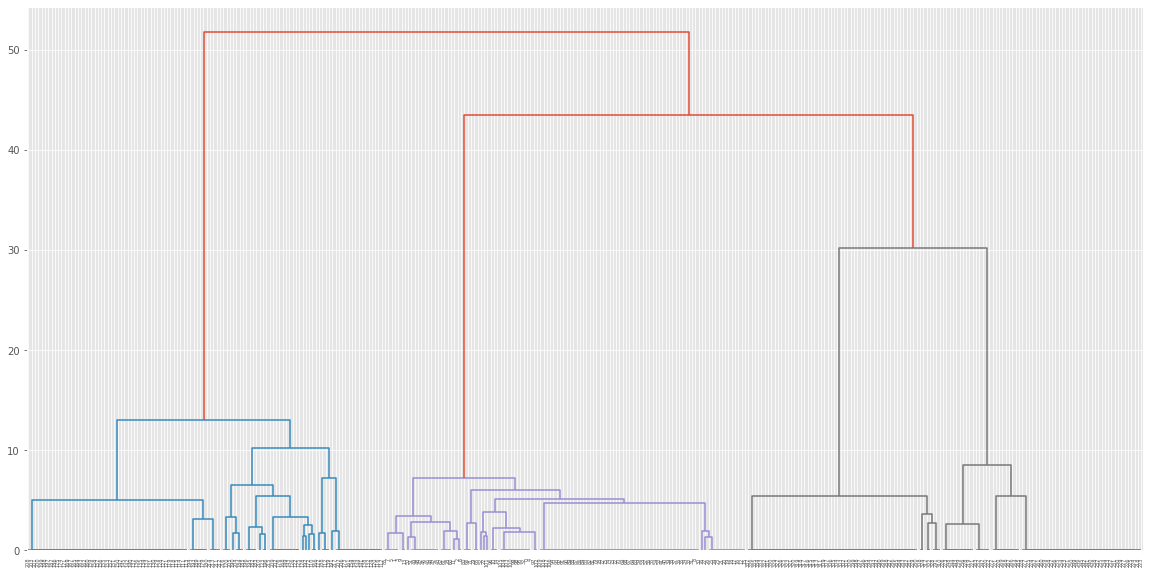

In [34]:
dn = dendrogram(link, orientation= "top")

Функция предлагает нам разделение на 3 кластера, визуально я в принципе согласен, но выкинул бы из датасета те данные, которые выбиваются из этих трех больших скоплений (у каждого кластера есть по такому ветвлению с малым числом данных)

In [41]:
data['cluster'] = fcluster(link, 3, criterion='maxclust')

In [42]:
data['cluster'].value_counts()

3    120
2    110
1    108
Name: cluster, dtype: int64

In [44]:
data.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.983333,2.983333,2.958333,3.900000,3.916667,3.941667,3.900000,2.875000,2.875000,2.875000


### Интерпретация результатов:
- Кластер 1:

    V9, V10, V11 - больные (леденцы как лекарство)
    
- Кластер 2:

    V1, V2, V3 - говоруны/целовальщики (леденцы для свежего дыхания)
    
- Кластер 3:

    V5, V6, V7, V7 - сладкоежки + мудрецы (леденцы как сладость + способ концентрации)

P.S. в лекции советовали давать забавные названия, чтобы они легко запоминались



Третий кластер так и просится на разделение на сладкоежек и мудрецов

In [45]:
data[data.cluster == 3]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster
218,3,3,3,3,5,5,3,3,3,3,3,3
219,3,3,3,3,5,5,3,3,2,2,2,3
220,3,3,3,3,5,5,3,2,2,2,2,3
221,3,3,3,3,5,5,3,3,2,2,2,3
222,3,3,3,3,5,5,3,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
333,3,3,3,3,3,3,5,5,3,3,3,3
334,3,3,3,3,3,3,5,5,3,3,3,3
335,3,3,3,3,3,3,5,5,3,3,3,3
336,3,3,3,3,3,3,5,5,3,3,3,3


Даже по head+tail можно заметить это деление

In [46]:
data['cluster'] = fcluster(link, 4, criterion='maxclust')

In [47]:
data['cluster'].value_counts()

2    110
1    108
4     61
3     59
Name: cluster, dtype: int64

In [48]:
data.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


Судя по value_counts, третий кластер разделился на два, как мы и хотели.
Итоговые кластеры: 
- Кластер 1:
V9, V10, V11 - больные (леденцы как лекарство)
- Кластер 2:
V1, V2, V3 - говоруны/целовальщики (леденцы для свежего дыхания)
- Кластер 3:
V7, V8 - мудрецы (леденцы как способ концентрации)
- Кластер 4:
V5, V6 - сладкоежки (леденцы как сладость)

### Вывод: 
Самые многочисленные (и примерно равные по размеру) кластеры: больные и говоруны. Почти в два раза меньше по объему кластеры мудрецы и сладкоежки. 

Интересно, что придумали бы рекламщики - комбинировать в одну рекламу и акцент на болезнях, и на свежем дыхании, или делать две отдельные рекламы. Еще бы не забыть про два меньших кластера. 

На кластеры в принципе можно настроить таргетинг, 1 - самый простой, больное горло/нос (гуглит соответствующие симптомы);
2 - гуглит что-нибудь про свежесть дыхания; 3 - мне кажется могло бы подойти для бросающих курить (без а/б теста о степени уверенности сказать не могу); 4 - сладкоежки, думаю в гугл профиле есть такая пометка. 

### K-MEANS

Посмотрим, такое же ли число кластеров получится у K-MEANS. Число кластеров проверим методом локтя и distortion score. 

In [52]:
from sklearn.cluster import KMeans

In [54]:
df = data.drop("cluster", axis=1)

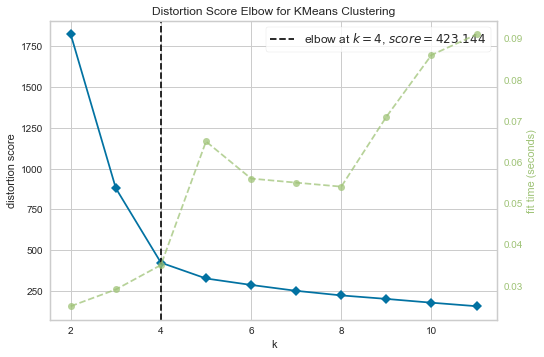

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
from yellowbrick.cluster import KElbowVisualizer
model = KElbowVisualizer(KMeans(), k=11)
model.fit(df)
model.show()

In [70]:
model = KMeans(n_clusters=4, random_state=42)

In [71]:
model.fit(df)

KMeans(n_clusters=4, random_state=42)

In [73]:
df['cluster'] = model.labels_

In [74]:
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
0,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
3,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


### Вывод:
KMeans поделил кластеры по тем же признакам, просто поменял их порядок.

### Задание 2 [10] - дополнительное

Используя сжатие признаков, оптимизируйте алгоритмы кластеризации с сохранением до 80% информации. Представить результаты сжатия и показать эффективность работы при сжатии (время работы алгоритма)

По результатам кластеринга приходит на ум, что если кластеров всего 4, то мы сможем обойтись 4 столбцами

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components=0.8)

In [80]:
pca_data = data.drop('cluster', axis=1)

In [81]:
pca_data = pca.fit_transform(pca_data)

In [88]:
import time

In [89]:
model = KMeans(n_clusters=4, random_state=42)
t0 = time.time()
model.fit(pca_data)
t1 = time.time()

In [91]:
print(t1-t0)

0.029633283615112305


In [95]:
data['cluster'] = model.labels_

In [96]:
data.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
0,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000


In [97]:
model = KMeans(n_clusters=4, random_state=42)
t0 = time.time()
model.fit(data.drop('cluster', axis=1))
t1 = time.time()

In [98]:
print(t1-t0)

0.03500628471374512


### Вывод:
Данных не так много, разница в скорости обучения модели конечно есть, но незначительная